In [192]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import numpy as np
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [193]:
data = pd.read_csv("heart.csv")

In [194]:
nrow = data.shape[0]
ncol = data.shape[1]
dim = f"Liczba wierszy: {nrow}, liczba kolumn: {ncol}"
print(dim)

Liczba wierszy: 303, liczba kolumn: 14


In [195]:
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [196]:
data.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [197]:
x = ['sex','exng','caa','cp','fbs','restecg','slp','thall','age','trtbps','chol','thalachh','oldpeak']
categorical_cols = ['sex','exng','caa','cp','fbs','restecg','slp','thall']
continuous_cols = ['age','trtbps','chol','thalachh','oldpeak']
target= ['output']

In [198]:
data[continuous_cols].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
trtbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
thalachh,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [199]:
data_cont = data[continuous_cols]
data_cont.head()

,age,trtbps,chol,thalachh,oldpeak
0,63,145,233,150,2.3
1,37,130,250,187,3.5
2,41,130,204,172,1.4
3,56,120,236,178,0.8
4,57,120,354,163,0.6


<AxesSubplot:ylabel='oldpeak'>

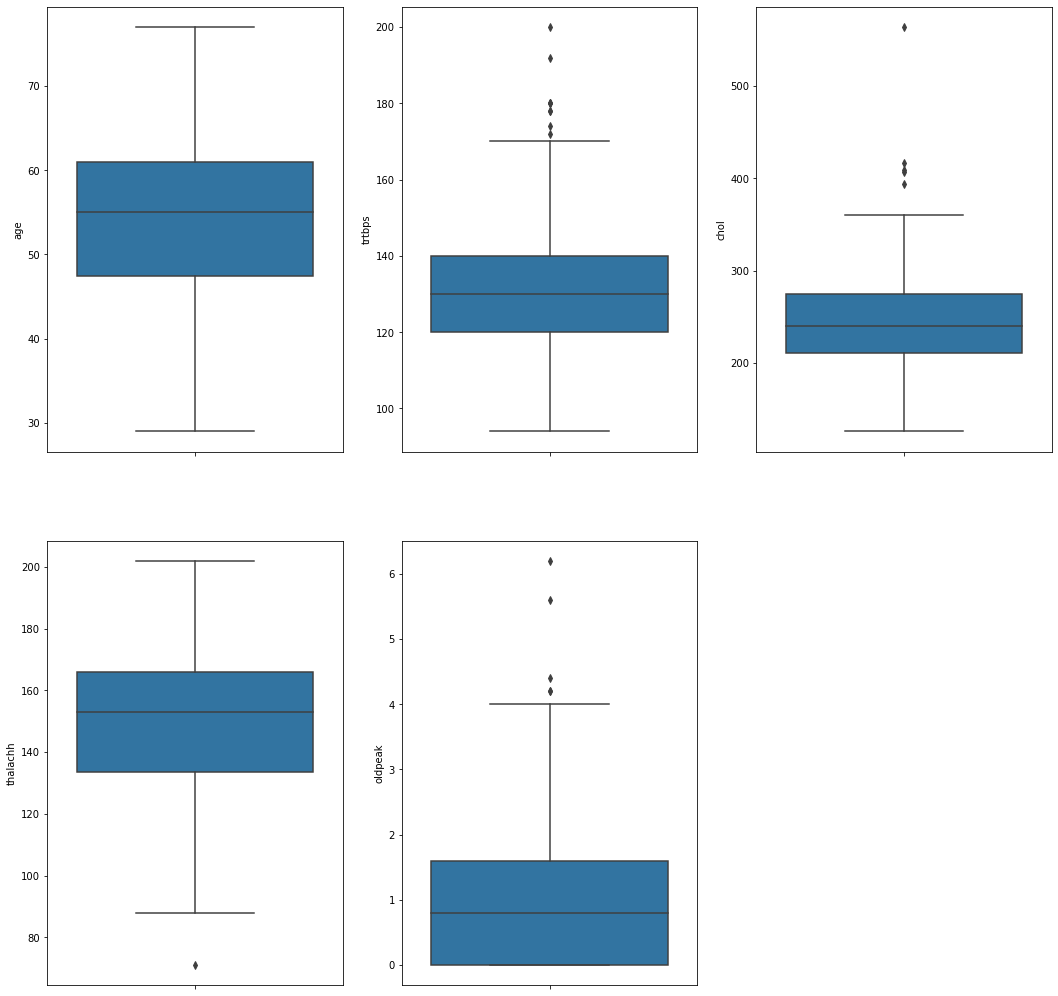

In [200]:
plt.figure(figsize=(18,18))
plt.subplot(2,3,1)
sns.boxplot(y=data["age"])
plt.subplot(2,3,2)
sns.boxplot(y=data["trtbps"])
plt.subplot(2,3,3)
sns.boxplot(y=data["chol"])
plt.subplot(2,3,4)
sns.boxplot(y=data["thalachh"])
plt.subplot(2,3,5)
sns.boxplot(y=data["oldpeak"])

In [201]:
print(f"sex \n {data.sex.value_counts()}")
print(f"exng \n {data.exng.value_counts()}")
print(f"caa \n {data.caa.value_counts()}")
print(f"cp \n {data.cp.value_counts()}")
print(f"fbs \n {data.fbs.value_counts()}")
print(f"restecg \n {data.restecg.value_counts()}")
print(f"slp \n {data.slp.value_counts()}")
print(f"thall \n {data.thall.value_counts()}")


sex 
 1    207
0     96
Name: sex, dtype: int64
exng 
 0    204
1     99
Name: exng, dtype: int64
caa 
 0    175
1     65
2     38
3     20
4      5
Name: caa, dtype: int64
cp 
 0    143
2     87
1     50
3     23
Name: cp, dtype: int64
fbs 
 0    258
1     45
Name: fbs, dtype: int64
restecg 
 1    152
0    147
2      4
Name: restecg, dtype: int64
slp 
 2    142
1    140
0     21
Name: slp, dtype: int64
thall 
 2    166
3    117
1     18
0      2
Name: thall, dtype: int64


<AxesSubplot:xlabel='thall', ylabel='count'>

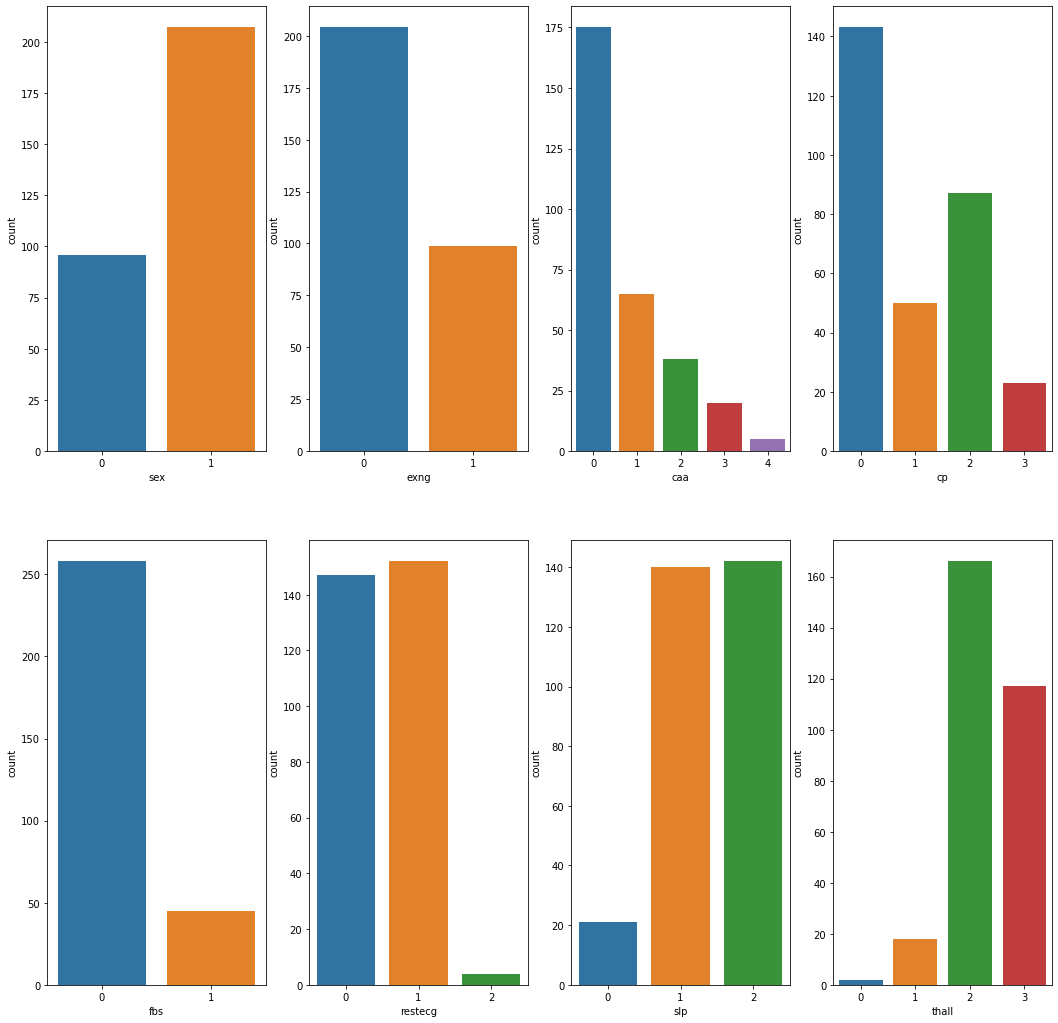

In [202]:
plt.figure(figsize=(18,18))
plt.subplot(2,4,1)
sns.countplot(x=data["sex"])
plt.subplot(2,4,2)
sns.countplot(x=data["exng"])
plt.subplot(2,4,3)
sns.countplot(x=data["caa"])
plt.subplot(2,4,4)
sns.countplot(x=data["cp"])
plt.subplot(2,4,5)
sns.countplot(x=data["fbs"])
plt.subplot(2,4,6)
sns.countplot(x=data["restecg"])
plt.subplot(2,4,7)
sns.countplot(x=data["slp"])
plt.subplot(2,4,8)
sns.countplot(x=data["thall"])

target 
 1    165
0    138
Name: output, dtype: int64


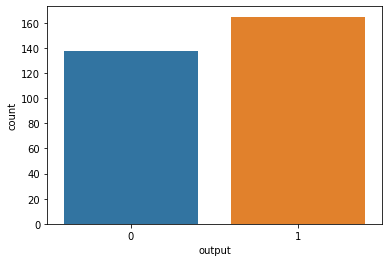

In [203]:
sns.countplot(x=data["output"])
print(f"target \n {data.output.value_counts()}")

In [204]:
data.corr()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trtbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalachh,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exng,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


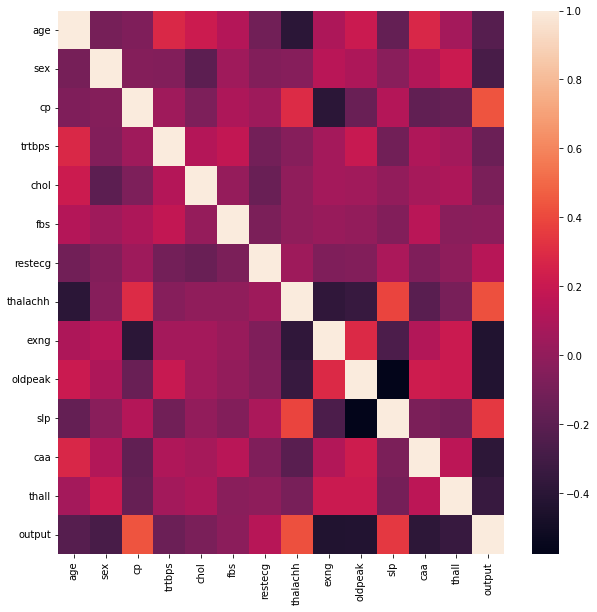

In [205]:
plt.figure(figsize=(10,10))
ax = sns.heatmap(data.corr())

<AxesSubplot:xlabel='age', ylabel='Density'>

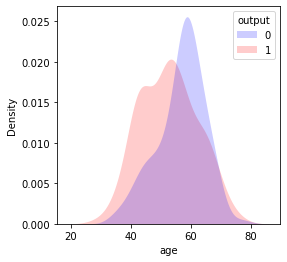

In [206]:
#age
fig = plt.figure(figsize=(4,4))
sns.kdeplot(data=data, x='age',hue="output", fill=True,palette=["blue","red"], alpha=.2, linewidth=0)

sex  output
0    0          24
     1          72
1    0         114
     1          93
dtype: int64

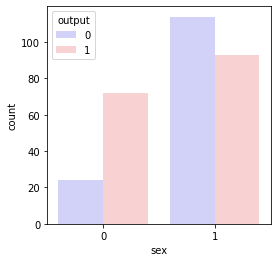

In [68]:
#sex
fig = plt.figure(figsize=(4,4))
sns.countplot(data=data, x='sex',palette=["blue","red"],alpha=.2, hue='output')

a = data.groupby(["sex","output"])
a = a.size()
a


<AxesSubplot:xlabel='cp', ylabel='count'>

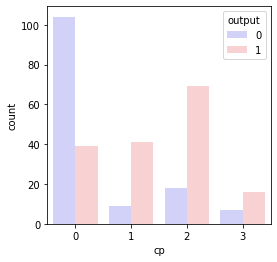

In [42]:
#cp
fig = plt.figure(figsize=(4,4))
sns.countplot(data=data, x='cp',palette=["blue","red"],alpha=.2, hue='output')

<AxesSubplot:xlabel='trtbps', ylabel='Density'>

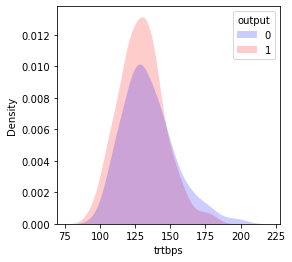

In [43]:
#trtbps
fig = plt.figure(figsize=(4,4))
sns.kdeplot(data=data, x='trtbps',hue="output", fill=True,palette=["blue","red"], alpha=.2, linewidth=0)

<AxesSubplot:xlabel='chol', ylabel='Density'>

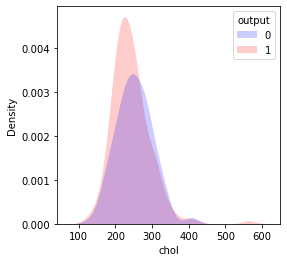

In [44]:
#chol
fig = plt.figure(figsize=(4,4))
sns.kdeplot(data=data, x='chol',hue="output", fill=True,palette=["blue","red"], alpha=.2, linewidth=0)

<AxesSubplot:xlabel='fbs', ylabel='count'>

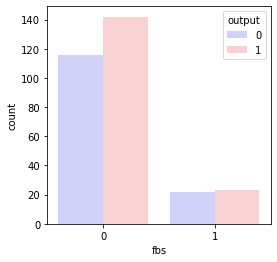

In [46]:
#fbs
fig = plt.figure(figsize=(4,4))
sns.countplot(data=data, x='fbs',hue="output", fill=True,palette=["blue","red"], alpha=.2, linewidth=0)

<AxesSubplot:xlabel='restecg', ylabel='count'>

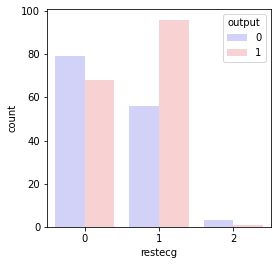

In [48]:
#restecg
fig = plt.figure(figsize=(4,4))
sns.countplot(data=data, x='restecg',hue="output", fill=True,palette=["blue","red"], alpha=.2, linewidth=0)

<AxesSubplot:xlabel='thalachh', ylabel='Density'>

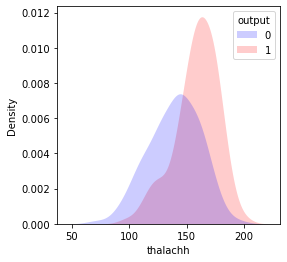

In [50]:
#thalachh
fig = plt.figure(figsize=(4,4))
sns.kdeplot(data=data, x='thalachh',hue="output", fill=True,palette=["blue","red"], alpha=.2, linewidth=0)

exng  output
0     0          62
      1         142
1     0          76
      1          23
dtype: int64

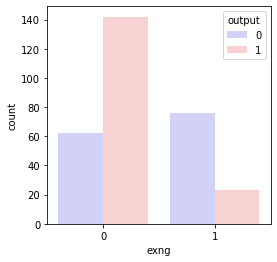

In [70]:
#exng
fig = plt.figure(figsize=(4,4))
sns.countplot(data=data, x='exng',hue="output", fill=True,palette=["blue","red"], alpha=.2, linewidth=0)

a = data.groupby(["exng","output"])
a = a.size()
a

<AxesSubplot:xlabel='oldpeak', ylabel='Density'>

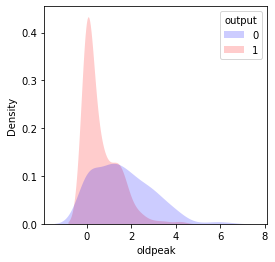

In [38]:
#oldpeak
fig = plt.figure(figsize=(4,4))
color_palette = ["#800000","#8000ff","#6aac90","#5833ff","#da8829"]
sns.kdeplot(data=data, x='oldpeak',hue="output", fill=True,palette=["blue","red"], alpha=.2, linewidth=0)


<AxesSubplot:xlabel='exng', ylabel='count'>

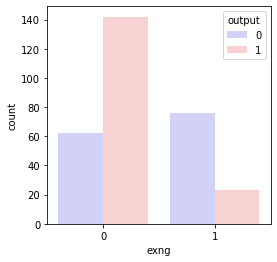

In [53]:
#exng
fig = plt.figure(figsize=(4,4))
sns.countplot(data=data, x='exng',hue="output", fill=True,palette=["blue","red"], alpha=.2, linewidth=0)

<AxesSubplot:xlabel='caa', ylabel='count'>

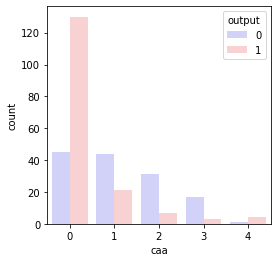

In [54]:
#caa
fig = plt.figure(figsize=(4,4))
sns.countplot(data=data, x='caa',hue="output", fill=True,palette=["blue","red"], alpha=.2, linewidth=0)

<AxesSubplot:xlabel='thall', ylabel='count'>

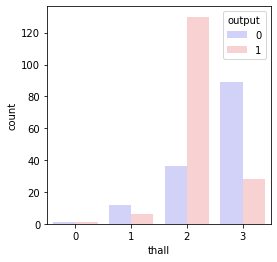

In [57]:
#thall
fig = plt.figure(figsize=(4,4))
sns.countplot(data=data, x='thall',hue="output", fill=True,palette=["blue","red"], alpha=.2, linewidth=0)

In [71]:
from sklearn.preprocessing import RobustScaler #do skalowania

from sklearn.model_selection import train_test_split #do dzielenia na zbior uczacy i testowy

# Cross Validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [80]:
df = data

# zamiana danych kategorycznych 
df = pd.get_dummies(df, columns = categorical_cols, drop_first = True)

# podział na zmienne objasniajace oraz zmienna objasniana
X = df.drop(['output'],axis=1)
y = df[['output']]

In [104]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 2)

In [159]:
y_train = y_train.values[:,0]
y_test = y_test.values[:,0]
print('Shape for training data', x_train.shape, y_train.shape)
print('Shape for testing data', x_test.shape, y_test.shape)

Shape for training data (242, 22) (242,)
Shape for testing data (61, 22) (61,)


In [106]:
#skalowanie danych (dopiero po podziale!)
scaler = RobustScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [184]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression    
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier    
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [138]:
model = LogisticRegression()
model.fit(x_train, y_train)
predicted = model.predict(x_test)

conf = confusion_matrix(y_test, predicted)
print ("Confusion Matrix : \n", conf)
print ("The accuracy of Logistic Regression is : ", accuracy_score(y_test, predicted)*100, "%")

Confusion Matrix : 
 [[28  4]
 [ 0 29]]


The accuracy of Logistic Regression is :  93.44262295081968 %


In [181]:
model = KNeighborsClassifier(n_neighbors = 5)  
model.fit(x_train, y_train)
predicted = model.predict(x_test)
  
print(confusion_matrix(y_test, predicted))
print("The accuracy of KNN is : ", accuracy_score(y_test, predicted.round())*100, "%")


[[26  6]
 [ 2 27]]
The accuracy of KNN is :  86.88524590163934 %


Minimum error:- 0.09836065573770492 at K = 15


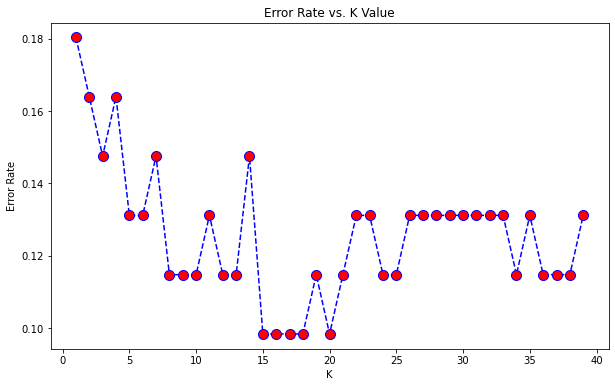

In [178]:
error_rate=[]
for i in range(1,40):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(x_train,y_train)
 pred_i = knn.predict(x_test)
 error_rate.append(np.mean(pred_i != y_test))

    
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate))+1)

Maximum accuracy:- 0.9016393442622951 at K = 15


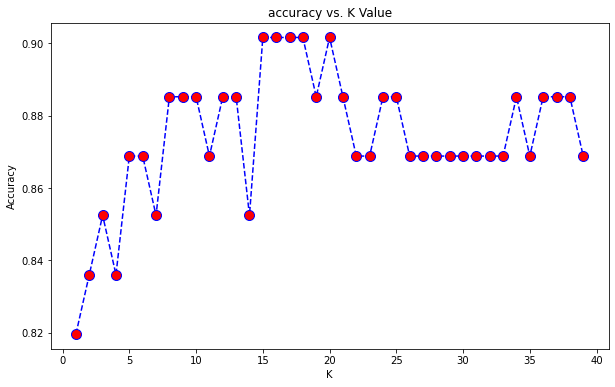

In [179]:
acc = []
for i in range(1,40):
    neigh = KNeighborsClassifier(n_neighbors = i).fit(x_train,y_train)
    yhat = neigh.predict(x_test)
    acc.append(metrics.accuracy_score(y_test, yhat))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,40),acc,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:-",max(acc),"at K =",acc.index(max(acc))+1)

In [182]:
model = KNeighborsClassifier(n_neighbors = 15)  
model.fit(x_train, y_train)
predicted = model.predict(x_test)
  

print(confusion_matrix(y_test, predicted))
print("The accuracy of KNN is : ", accuracy_score(y_test, predicted.round())*100, "%")


[[27  5]
 [ 1 28]]
The accuracy of KNN is :  90.1639344262295 %


In [175]:
model = SVC()
model.fit(x_train, y_train)
predicted = model.predict(x_test)

print("The accuracy of SVM is : ", accuracy_score(y_test, predicted)*100, "%")
conf = confusion_matrix(y_test, predicted)
print ("Confusion Matrix : \n", conf)

The accuracy of SVM is :  91.80327868852459 %
Confusion Matrix : 
 [[28  4]
 [ 1 28]]


In [190]:
model = DecisionTreeClassifier(random_state = 13)
model.fit(x_train, y_train)
predicted = model.predict(x_test)

print("The accuracy of DecisionTree is : ", accuracy_score(y_test, predicted)*100, "%")
conf = confusion_matrix(y_test, predicted)
print ("Confusion Matrix : \n", conf)

The accuracy of DecisionTree is :  77.04918032786885 %
Confusion Matrix : 
 [[22 10]
 [ 4 25]]


In [191]:
model = RandomForestClassifier(random_state = 13)
model.fit(x_train, y_train)
predicted = model.predict(x_test)

print("The accuracy of RandomForest is : ", accuracy_score(y_test, predicted)*100, "%")
conf = confusion_matrix(y_test, predicted)
print ("Confusion Matrix : \n", conf)

The accuracy of RandomForest is :  85.24590163934425 %
Confusion Matrix : 
 [[27  5]
 [ 4 25]]
